In [166]:
import pandas as pd
from scipy.io import loadmat
import tables
import numpy as np
import glob
import random

In [167]:
"""
Author: Trevor Jordan Grant.
default4: spatial/verbal
"""
# Dictionary is labeled such that task labels in conditions files will have
# more than one multilabeling schema.

# To add more multilabeling schema - include them in the task Dictionary.
# (The sub-dictionary where the task label is the key.)

# default4 = ["VerbalWM", "SpatialWM", "VisualPerceptual", "AuditoryPerceptual"]
# every label in default 4 has discrete values of 'off', 'low', 'high'

# default3 = ["WM", "VisualPerceptual", "AuditoryPerceptual"]
# every label in default 3 has discrete values of 'off', 'low', 'high'

cog_load_label_dict = {
# Mindfulness task labels.
                       "nb": {
                              "default4": ["high", "off", "low", "off"],
                              "default3": ["high", "low", "off"],
                             },
                       "anb": {
                               "default4": ["high", "off", "off", "low"],
                               "default3": ["high", "off", "low"],
                              },
                       "ewm": {
                               "default4": ["low", "off", "high", "off"],
                               "default3": ["low", "high", "off"]
                              },
                        "cr": {
                               "default4": ["off", "off", "off", "off"],
                               "default3": ["off", "off", "off"],
                              },
                        "rt": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
                        "es": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
                       "gng": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
            "adaptive_words": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
                   "go_nogo": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
                     "nback": {
                               "default4": ["high", "off", "low", "off"],
                               "default3": ["high", "low", "off"],
                              },
                    "posner": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
                 "simple_rt": {
                               "default4": ["off", "off", "low", "off"],
                               "default3": ["off", "low", "off"],
                              },
             "visual_search": {
                               "default4": ["off", "off", "high", "off"],
                               "default3": ["off", "high", "off"],
                              },
                      }


def strings_to_vectors(string_labels, as_list=False):
    """Maps strings in dict to interger values.
    Args:
        string_labels(list): The string label value of load.
        as_list(bool): False, if True, return list instead of np.array()
    Returns:
        labels as np.array()
    """

    maps = {
            "off": 0,
            "low": 1,
            "high": 2,
           }

    if as_list:
        return [maps[label] for label in string_labels]
    return np.array([maps[label] for label in string_labels])


def return_label(task, label_type="default3", as_strings=False):
    """Returns a label from the cog_load_label_dict.
    Args:
        task(str): The task label from the coditions file.
        label_type(string): The label schema used for the model.
        as_strings(bool): False, if True, return string (in list) values instead.
    Returns:
        labels(np.array): Under defaults labels will be returned as interger
        values in a np.array().
    """
    if as_strings:
        return cog_load_label_dict[task][label_type]
    return strings_to_vectors(cog_load_label_dict[task][label_type])

In [168]:
channel_52_5x11_mat = {
           1:[0,1],  2:[0,2],  3:[0,3],  4:[0,4],  5:[0,5],  6:[0,6],  7:[0,7],  8:[0,8],  9:[0,9], 10:[0,10], 
11:[1,0], 12:[1,1], 13:[1,2], 14:[1,3], 15:[1,4], 16:[1,5], 17:[1,6], 18:[1,7], 19:[1,8], 20:[1,9], 21:[1,10], 
          22:[2,1], 23:[2,2], 24:[2,3], 25:[2,4], 26:[2,5], 27:[2,6], 28:[2,7], 29:[2,8], 30:[2,9], 31:[2,10], 
32:[3,0], 33:[3,1], 34:[3,2], 35:[3,3], 36:[3,4], 37:[3,5], 38:[3,6], 39:[3,7], 40:[3,8], 41:[3,9], 42:[3,10], 
          43:[4,1], 44:[4,2], 45:[4,3], 46:[4,4], 47:[4,5], 48:[4,6], 49:[4,7], 50:[4,8], 51:[4,9], 52:[4,10]
}

def get_52_5x11_mat(data):
    # returns a matrix of size 5x11.
    mat = np.zeros((5, 11))
    for idx, i in enumerate((data)):
        loc = channel_52_5x11_mat[idx+1]
        mat[loc[0], loc[1]] = i
    return mat

channel_52_5x22_mat = {
           1:[0,1],  2:[0,3],  3:[0,5],  4:[0,7],  5:[0,9],  6:[0,11],  7:[0,13],  8:[0,15],  9:[0,17], 10:[0,19], 
11:[1,0], 12:[1,2], 13:[1,4], 14:[1,6], 15:[1,8], 16:[1,10], 17:[1,12], 18:[1,14], 19:[1,16], 20:[1,18], 21:[1,20], 
          22:[2,1], 23:[2,3], 24:[2,5], 25:[2,7], 26:[2,9], 27:[2,11], 28:[2,13], 29:[2,15], 30:[2,17], 31:[2,19], 
32:[3,0], 33:[3,2], 34:[3,4], 35:[3,6], 36:[3,8], 37:[3,10], 38:[3,12], 39:[3,14], 40:[3,16], 41:[3,18], 42:[3,20], 
          43:[4,1], 44:[4,3], 45:[4,5], 46:[4,7], 47:[4,9], 48:[4,11], 49:[4,13], 50:[4,15], 51:[4,17], 52:[4,19]
}

def get_52_5x22_mat(data):
    # returns a matrix of size 5x11.
    mat = np.zeros((5, 22))
    for idx, i in enumerate((data)):
        loc = channel_52_5x22_mat[idx+1]
        mat[loc[0], loc[1]] = i
    return mat



In [169]:

def collapse_tasks(tasks, min_dur):
    collapsed_tasks = []
    collapsed_tasks.append(
        tasks[0]
    )
    for i in range(1, len(tasks)):
        t1 = collapsed_tasks[-1]
        t2 = tasks[i]
        if t1["class"] == t2["class"] and (t2["duration"] < min_dur and t1["duration"] < min_dur):
            
            t1["data"] = np.concatenate((t1["data"], t2["data"]), axis=0)
            t1["duration"]+=t2["duration"]
            t1["end"]=t1["onset"]+t2["duration"]
            # merge and append
        else:
            # just append
            collapsed_tasks.append(t2)
    return collapsed_tasks
            
def read_tasks(condition, data):
    # conditions, data = csv, mat files
    # tuple containing (class, onset, duration, offset, oxy_data, dxy_data)
    tasks = []
    # read conditions, data
    c_data = pd.read_csv(condition)
    m_data = loadmat(data)
    # get oxy, dxy data
    oxyDaya = m_data['nirs_data'][0][0][0]
    dxyData = m_data['nirs_data'][0][0][1]
    # iterate through all the tasks here now.
    for idx, key in enumerate(list(c_data.keys())):
        start = 0
        end = 0
        class_ = None
        if 'Task' in key or 'all_benchmarks_fNIRS' in key:
            # get start and end index of the task
            if 'Task' in key:
                start = int(c_data[key][0])
                duration = int(c_data[key][1])
                class_ = c_data[key][2]
            else:
                start = int(c_data[key][2])
                duration = int(c_data[key][3]) 
                class_ = c_data[key][4]
            end = start + duration
            
            # visualize heatmap: 
            # sns.heatmap(get_52_mat(oxyDaya[0]))

            oxy_series = oxyDaya[start:end, :]
            dxy_series = dxyData[start:end, :]

            # a 100x5x22 list
            oxy_dxy_series_mat = np.zeros((duration,2, 5, 11))

            for ts, (oxy_slice, dxy_slice) in enumerate(zip(oxy_series, dxy_series)):
                oxy_slice = get_52_5x11_mat(oxy_slice)
                dxy_slice = get_52_5x11_mat(dxy_slice)

                #oxy_dxy_series_mat[ts] = np.hstack([oxy_slice, dxy_slice])
                oxy_dxy_series_mat[ts] = np.array([oxy_slice, dxy_slice])
            tasks.append(
                {
                    "class": class_,
                    "onset": start,
                    "end": end,
                    "duration": duration,
                    "data" : oxy_dxy_series_mat
                }
            )
    return tasks 


In [170]:
conditions = glob.glob('../../../data/multilabel/mats/*fNIRS_conditions_*.csv')
data = glob.glob('../../../data/multilabel/mats/*Probe1_*.csv.mat')

In [171]:
task_data = []
time_series_length = 250
"""
default3 labels
[ 
    wm, 
    v, 
    a
]
"""

for idx, (cond, dat) in enumerate(zip(conditions, data)):
    tasks = read_tasks(cond, dat)
    for t in tasks:
        task_data.append(t)
    task_data = collapse_tasks(task_data, min_dur=time_series_length)

In [172]:
labels_bin = {"wm":{0:0, 1:0, 2:0}, "vl":{0:0, 1:0, 2:0}, "al":{0:0, 1:0, 2:0}}
task_cond_bin = {i:0 for i in cog_load_label_dict}
for t in task_data:
    label = return_label(t["class"])
    task_cond_bin[t["class"]]+=1
    labels_bin["wm"][label[0]]+=1
    labels_bin["vl"][label[1]]+=1
    labels_bin["al"][label[2]]+=1

In [173]:
print(task_cond_bin, labels_bin)

{'cr': 156, 'nback': 0, 'nb': 26, 'posner': 0, 'es': 26, 'simple_rt': 0, 'gng': 26, 'visual_search': 0, 'ewm': 26, 'adaptive_words': 0, 'rt': 26, 'go_nogo': 0, 'anb': 26} {'al': {0: 286, 1: 26, 2: 0}, 'vl': {0: 182, 1: 104, 2: 26}, 'wm': {0: 234, 1: 26, 2: 52}}


In [174]:
"""
    write data to disk
"""
random.shuffle(task_data)
for idx, data in enumerate(task_data[0:270]):
    oxy_dxy_data = np.zeros((time_series_length, 2, 5, 11))
    data_len = data["data"].shape[0]
    oxy_dxy_data[:min(data_len, time_series_length)] = data["data"][:min(data_len, time_series_length)]
    np.save("C:\\Users\\dhruv\\Development\\git\\thesis_dl-fnirs\\data\\multilabel\\train\\" + str(idx), np.asarray([oxy_dxy_data, return_label(data["class"])]))

for idx, data in enumerate(task_data[270:]):
    oxy_dxy_data = np.zeros((time_series_length, 2, 5, 11))
    data_len = data["data"].shape[0]
    oxy_dxy_data[:min(data_len, time_series_length)] = data["data"][:min(data_len, time_series_length)]
    np.save("C:\\Users\\dhruv\\Development\\git\\thesis_dl-fnirs\\data\\multilabel\\val\\" + str(idx), np.asarray([oxy_dxy_data, return_label(data["class"])]))

In [175]:
task_data[1]["data"].shape

(850, 2, 5, 11)

In [202]:
import seaborn as sns;
sns.set();
import matplotlib.pyplot as plt

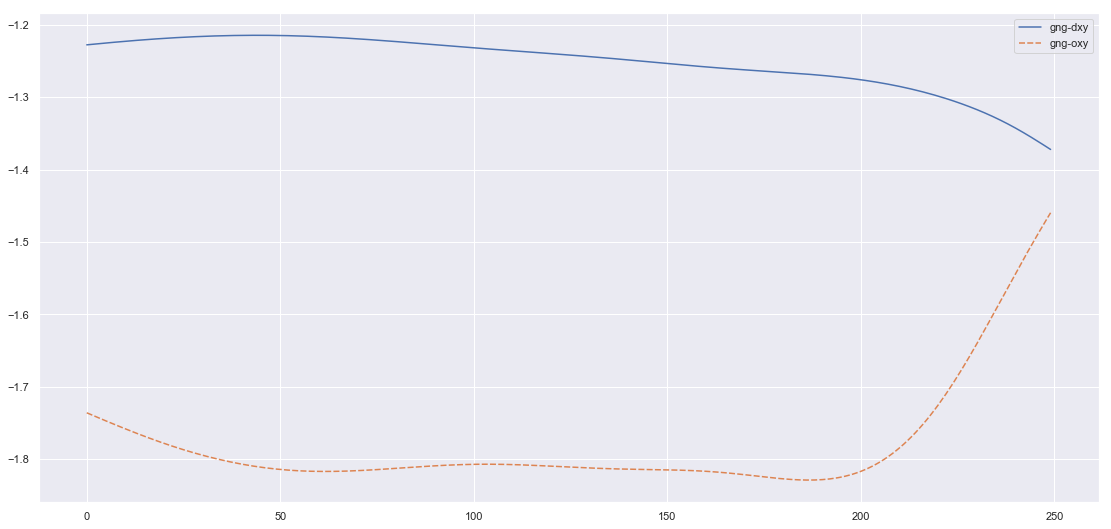

In [210]:
cond_1 = 0
cond_2 = 1

oxy_1 = [i[0, 1, 1] for i in task_data[cond_1]["data"]]
dxy_1 = [i[1, 1, 1] for i in task_data[cond_1]["data"]]

oxy_2 = [i[0, 1, 1] for i in task_data[cond_2]["data"]]
dxy_2 = [i[1, 1, 1] for i in task_data[cond_2]["data"]]

df = pd.DataFrame.from_dict({
    task_data[cond_2]["class"]+"-oxy": oxy_1,
    task_data[cond_2]["class"]+"-dxy": dxy_1
})

plt.figure(figsize=(19, 9))
ax = sns.lineplot(data=df)
plt.sa

In [196]:
y.shape

(250, 2)

In [88]:
cond_1 = 0
cond_2 = 1

for i in range(0, 5):
    for j in range(0, 11):
        oxy_1 = go.Scatter(
                x = np.linspace(0, time_series_length, time_series_length),
                y = task_data[cond_1]["data"][:, i, j],
                mode = 'lines+markers',
                name = task_data[cond_1]["class"]+'-oxy',
                marker = {"symbol":200}
            )

        oxy_2 = go.Scatter(
                x = np.linspace(0, time_series_length, time_series_length),
                y = task_data[cond_2]["data"][:, i, j],
                mode = 'lines+markers',
                name = task_data[cond_2]["class"]+'-oxy',
                marker = {"symbol":200}
            )


        dxy_1 = go.Scatter(
                x = np.linspace(0, time_series_length, time_series_length),
                y = task_data[cond_1]["data"][:, i, j+11],
                mode = 'lines+markers',
                name = task_data[cond_1]["class"]+'-dxy',
                marker = {"symbol":300}
            )

        dxy_2 = go.Scatter(
                x = np.linspace(0, time_series_length, time_series_length),
                y = task_data[cond_2]["data"][:, i, j+11],
                mode = 'lines+markers',
                name = task_data[cond_2]["class"]+'-dxy',
                marker = {"symbol":300}
            )
        data = [oxy_1, oxy_2, dxy_1, dxy_2]
        layout = go.Layout(
                title= 'CLASSWISE SIGNAL COMPARISION',
                hovermode= 'closest',
                xaxis= dict(
                    title= 'TIME',
                    ticklen= 5,
                    zeroline= False,
                    gridwidth= 2,
                ),
                yaxis=dict(
                    title= 'AMP',
                    ticklen= 5,
                    gridwidth= 2,
                )
            )

        fig = go.Figure(data, layout=layout)
        py.iplot(fig, filename="dataset_thesis-dl")
        pio.write_image(fig, task_data[cond_1]["class"]+'_'+task_data[cond_2]["class"]+'_'+str(i*11+j)+'.png')

PlotlyRequestError: Hi there, you've reached the threshold of 100 combined image exports and chart saves per 24h period. If you need to raise your daily limit, please consider upgrading to a paid plan.

In [93]:
import torch
import torchvision

In [94]:
train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('./', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=8, shuffle=True)

9920512it [00:01, 5644419.31it/s]                                                                                      


Extracting ./MNIST\raw\train-images-idx3-ubyte.gz


32768it [00:00, 151410.68it/s]                                                                                         


Extracting ./MNIST\raw\train-labels-idx1-ubyte.gz


1654784it [00:00, 2343504.93it/s]                                                                                      


Extracting ./MNIST\raw\t10k-images-idx3-ubyte.gz


8192it [00:00, 60843.96it/s]                                                                                           


Extracting ./MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


In [97]:
train_loader.dataset.__getitem__(0)[1]

5